The Solow Model 
- A macroeconomic model that investigates the sources of economic growth in an economy

Assumptions of the economy:

1) There is a single representative firm in the economy.

2) The economy has a fixed labor force.

3) The production function exhibits constant returns to scale.

4) There are diminishing returns to capital accumulation.

5) The economy is closed, so there are no imports or exports.


We define the variables below:

Y = Output  # Gross Domestic Product

K = Capital stock

L = Labor force

A = Technological progress (total factor productivity)

s = Savings rate (proportion of output saved and invested)

δ = Depreciation rate (rate at which capital stock depreciates)

n = Labor force growth rate

a = is the output elasticity of capital

1-a is the output elasticity og labour





In [25]:
import numpy as np
from scipy import optimize
import scipy.optimize as opt
import sympy as sp
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:


#we now solve for an analythical solution. That is, we find the steady-state values of capital and output per capita.

#we do not include numerical expressions and solutions in this section.


# Variables

K, Y, L, A, s, δ, n, g, a = sp.symbols('K Y L A s δ n g a')
# Production Function
production_function = A * (K ** a) * (L ** (1 - a))
# Capital Accumulation
capital_accumulation = s * Y+ K*(1- δ )
# Labor Force Growth
labor_force_growth = n * L
# Technological Progress
technological_progress = g * A
# Output per Capita
output_per_capita = Y / L
# Capital per Capita
capital_per_capita = K / L
# Output per Capita Growth
output_per_capita_growth = (1 - n) * (s / capital_per_capita) - (δ + g)
# The steady-state equations are derived from the output per capita growth equation using sp.solve()
# Then, sp.lambdify() is used to convert the steady-state equation into a Python function
steady_state_equation = sp.solve(output_per_capita_growth.subs({a: a, 1 - a: 1 - a}), K)[0]
steady_state_function = sp.lambdify((A, s, δ, n, g, a), steady_state_equation)

A_initial = sp.symbols('A_initial')  # Initial level of technology

savings_rate = sp.symbols('savings_rate')

depreciation_rate = sp.symbols('depreciation_rate')

labor_force_growth_rate = sp.symbols('labor_force_growth_rate')

technological_growth_rate = sp.symbols('technological_growth_rate')

a_value = sp.symbols('a_value')

# Calculate steady-state capital per capita

steady_state_capital_per_capita = steady_state_function(A_initial, savings_rate, depreciation_rate, labor_force_growth_rate, technological_growth_rate, a_value)

# Calculate steady-state output per capita

steady_state_output_per_capita = production_function.subs({K: steady_state_capital_per_capita, L: L, A: A_initial, s: savings_rate, δ: depreciation_rate, n: labor_force_growth_rate, g: technological_growth_rate})

print("Steady-State Capital per Capita =", steady_state_capital_per_capita)

print("Steady-State Output per Capita =", steady_state_output_per_capita)

Steady-State Capital per Capita = L*savings_rate*(1 - labor_force_growth_rate)/(depreciation_rate + technological_growth_rate)
Steady-State Output per Capita = A_initial*L**(1 - a)*(L*savings_rate*(1 - labor_force_growth_rate)/(depreciation_rate + technological_growth_rate))**a


In [27]:
# We set the parameters
A_initial = 1.0  # Initial level of technology
savings_rate = 0.3  # Savings rate
depreciation_rate = 0.05  # Depreciation rate
labor_force_growth_rate = 0.02  # Labor force growth rate
technological_growth_rate = 0.01  # Technological growth rate
a = 0.3  # Production function parameter

# Define the objective function
def objective_function(x):
    k = x[0]  # Capital per capita
    y = A_initial * (k ** a) * (1 ** (1 - a))  # Output per capita
    return -y  # We add a negative sign as the optimization is a maximization problem

# Now we initiate our  convergence testing by defining five initial values of capital per capita
initial_conditions = [

    [0.1],    # Initial capital per capita

    [1.0],    # Initial capital per capita

    [10.0],   # Initial capital per capita

    [100.0],  # Initial capital per capita

    [1000.0]  # Initial capital per capita

]
#we do a loop to test the convergence of the Solow model for different initial conditions of capital per capita. 

# It helps determine if the model reaches a steady state regardless of the initial condition.
for i, initial_condition in enumerate(initial_conditions):

    result = opt.minimize(objective_function, initial_condition)

    if result.success:

        k_ss = result.x[0]

        y_ss = A_initial * (k_ss ** a) * (1 ** (1 - a))

        print(f"Test {i+1}: Convergence successful!")

        print(f"Optimal capital per capita: {k_ss}")

        print(f"Optimal output per capita: {y_ss}")

    else:

        print(f"Test {i+1}: Convergence failed.")

Test 1: Convergence successful!
Optimal capital per capita: 4276327.801145488
Optimal output per capita: 97.57112143175101
Test 2: Convergence successful!
Optimal capital per capita: 2728985.0620775362
Optimal output per capita: 85.27080196959093
Test 3: Convergence successful!
Optimal capital per capita: 3292253.918785862
Optimal output per capita: 90.20861125433946
Test 4: Convergence successful!
Optimal capital per capita: 4216029.578449249
Optimal output per capita: 97.15632852394293
Test 5: Convergence successful!
Optimal capital per capita: 4634011.1128995875
Optimal output per capita: 99.9509948754483


Our findings show that our initial set of capital per capita values (test 1, test 2, test 3, test 4 and test 5) all converge to a specific steady-state value of both output and capital. However, we do note that a change in any of the parameters or variables will alter our steady state values, but nothing indicates, that we will find divergence in our current model. 

In [28]:
# in this section, we find the steady state values while changing the parameters and variables, that were held constant in the previous section.

# Set the base parameter values as in the previous section
A_initial = 1.0  # Initial level of technology
savings_rate = 0.3  # Savings rate
depreciation_rate = 0.05  # Depreciation rate
labor_force_growth_rate = 0.02  # Labor force growth rate
technological_growth_rate = 0.01  # Technological growth rate
a = 0.3  # Production function parameter

# Function to calculate steady state values
def calculate_steady_state(A, s, δ, n, g, a):

    A_initial = A
    savings_rate = s
    depreciation_rate = δ
    labor_force_growth_rate = n
    technological_growth_rate = g

    # Define the objective function

    def objective_function(x):
        k = x[0]  # Capital per capita
        y = A_initial * (k ** a) * (1 ** (1 - a))  # Output per capita
        return -y  

    # Find the steady state values
    result = opt.minimize(objective_function, [0.1])

    if result.success:

        k_ss = result.x[0]

        y_ss = A_initial * (k_ss ** a) * (1 ** (1 - a))

        return k_ss, y_ss

    else:

        return None


# Now we loop over different parameter and variable values

parameters = [

    {'param': 'A', 'values': [1.0, 1.5, 2.0]},
    {'param': 's', 'values': [0.3, 0.4, 0.5]},
    {'param': 'δ', 'values': [0.05, 0.06, 0.07]},
    {'param': 'n', 'values': [0.02, 0.03, 0.04]},
    {'param': 'g', 'values': [0.01, 0.02, 0.03]},
    {'param': 'a', 'values': [0.3, 0.4, 0.5]}

]

for param_change in parameters:
    param = param_change['param']
    values = param_change['values']

    print(f"Parameter: {param}")
    for value in values:
        # Update the parameter value
        if param == 'A':
            A_initial = value
        elif param == 's':
            savings_rate = value
        elif param == 'δ':
            depreciation_rate = value
        elif param == 'n':
            labor_force_growth_rate = value
        elif param == 'g':
            technological_growth_rate = value
        elif param == 'a':
            a = value

        
        # We now calculate the steady state values
        k_ss, y_ss = calculate_steady_state(A_initial, savings_rate, depreciation_rate, labor_force_growth_rate, technological_growth_rate, a)
   
        # We print the parameter value and corresponding steady state values and base our conclusion on these findings.
        print(f"{param} = {value:.2f} => Steady state: k_ss = {k_ss:.4f}, y_ss = {y_ss:.4f}")

    print()



Parameter: A
A = 1.00 => Steady state: k_ss = 4276327.8011, y_ss = 97.5711
A = 1.50 => Steady state: k_ss = 9278740.7025, y_ss = 184.6452
A = 2.00 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817

Parameter: s
s = 0.30 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817
s = 0.40 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817
s = 0.50 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817

Parameter: δ
δ = 0.05 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817
δ = 0.06 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817
δ = 0.07 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817

Parameter: n
n = 0.02 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817
n = 0.03 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817
n = 0.04 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817

Parameter: g
g = 0.01 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817
g = 0.02 => Steady state: k_ss = 7876123.3018, y_ss = 234.3817
g = 0.03 => Steady state: k_ss = 7876123.3018, y_s


As evident, only a change in the technological level, A and the output elasticity of capital, affects the steady state levels of capital and output per capita. Changing the other parameters (g, n, δ and s) will not change SS levels, but only affect the time it takes the economy to convergence to SS. 

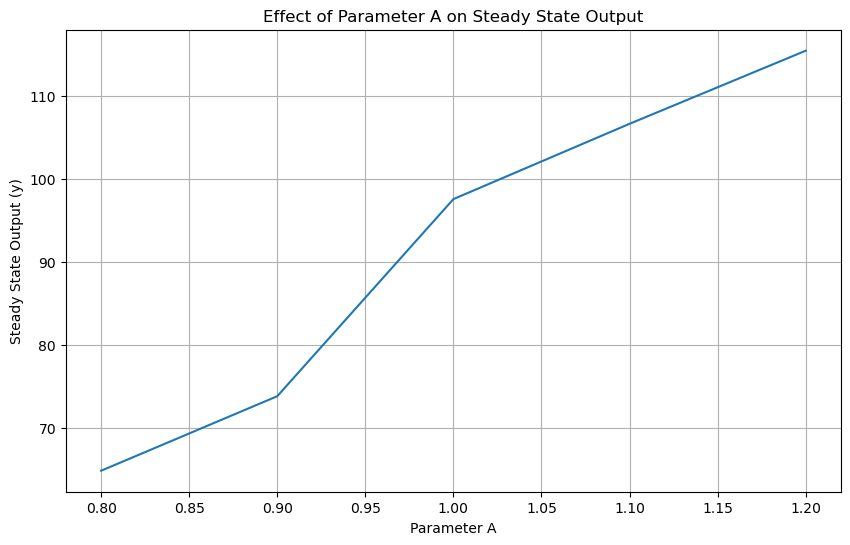

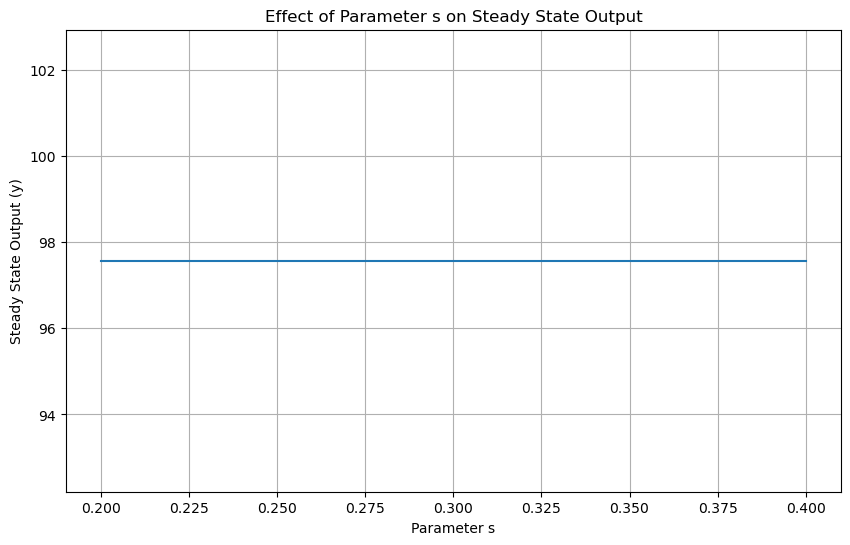

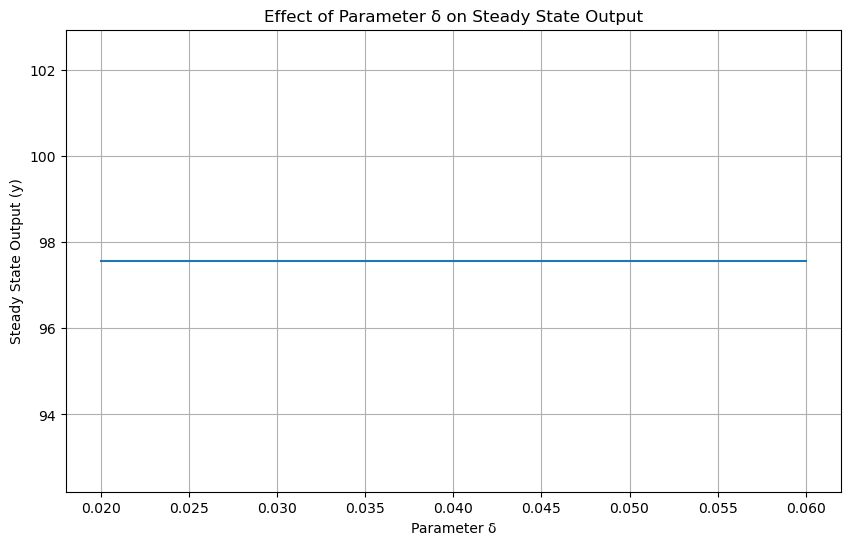

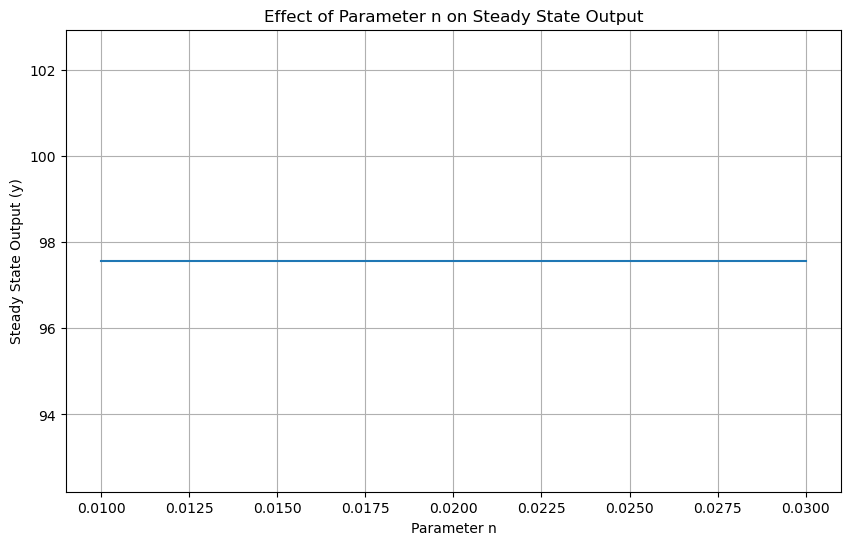

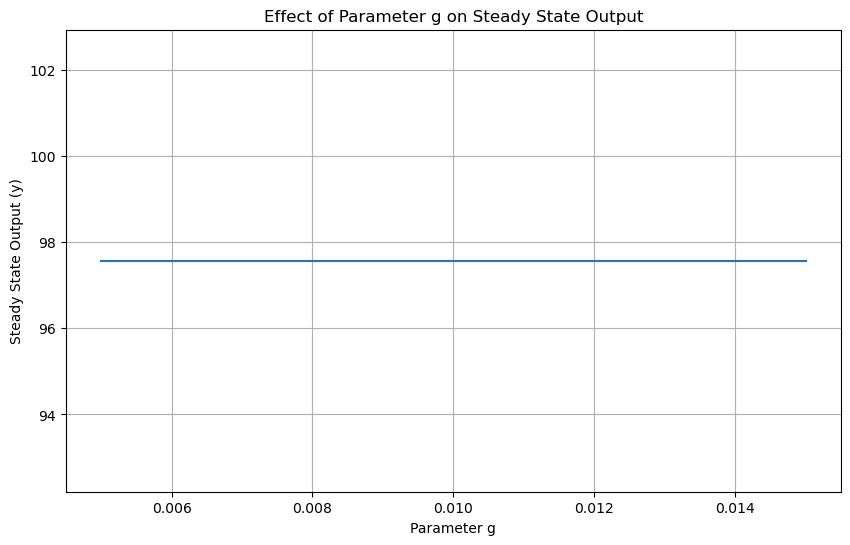

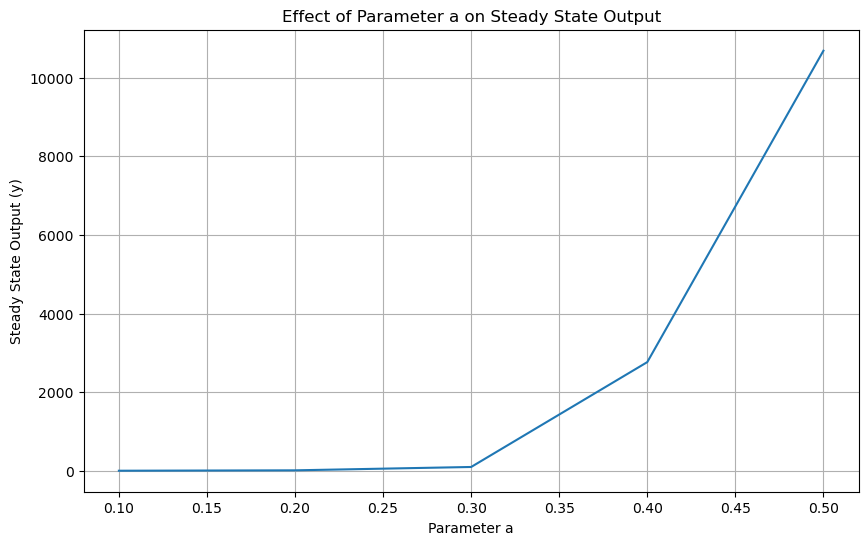

In [29]:
# we will now show in this section, how a changing one parameter or varibale at a time will affect SS, all other things equal.
# Here we define the range of parameter values to test
A_values = np.linspace(0.8, 1.2, 5)
s_values = np.linspace(0.2, 0.4, 5)
δ_values = np.linspace(0.02, 0.06, 5)
n_values = np.linspace(0.01, 0.03, 5)
g_values = np.linspace(0.005, 0.015, 5)
a_values = np.linspace(0.1, 0.5, 5)

# Here we define the function to calculate steady state output for a given parameter value
def calculate_steady_state_output(A, s, δ, n, g, a):
    k_ss, y_ss = calculate_steady_state(A, s, δ, n, g, a)
    return y_ss

# Here we plot model behavior when changing A
plt.figure(figsize=(10, 6))

y_values_A = [calculate_steady_state_output(A, 0.3, 0.05, 0.02, 0.01, 0.3) for A in A_values]

plt.plot(A_values, y_values_A)
plt.xlabel('Parameter A')
plt.ylabel('Steady State Output (y)')
plt.title('Effect of Parameter A on Steady State Output')
plt.grid(True)
plt.show()

# Here we plot model behavior when changing s
plt.figure(figsize=(10, 6))
y_values_s = [calculate_steady_state_output(1.0, s, 0.05, 0.02, 0.01, 0.3) for s in s_values]
plt.plot(s_values, y_values_s)
plt.xlabel('Parameter s')
plt.ylabel('Steady State Output (y)')
plt.title('Effect of Parameter s on Steady State Output')
plt.grid(True)
plt.show()

# Here we plot model behavior when changing δ
plt.figure(figsize=(10, 6))

y_values_δ = [calculate_steady_state_output(1.0, 0.3, δ, 0.02, 0.01, 0.3) for δ in δ_values]

plt.plot(δ_values, y_values_δ)
plt.xlabel('Parameter δ')
plt.ylabel('Steady State Output (y)')
plt.title('Effect of Parameter δ on Steady State Output')
plt.grid(True)
plt.show()

# Here we plot model behavior when changing n

plt.figure(figsize=(10, 6))

y_values_n = [calculate_steady_state_output(1.0, 0.3, 0.05, n, 0.01, 0.3) for n in n_values]
plt.plot(n_values, y_values_n)
plt.xlabel('Parameter n')
plt.ylabel('Steady State Output (y)')
plt.title('Effect of Parameter n on Steady State Output')
plt.grid(True)
plt.show()


# Here we plot model behavior when changing g

plt.figure(figsize=(10, 6))

y_values_g = [calculate_steady_state_output(1.0, 0.3, 0.05, 0.02, g, 0.3) for g in g_values]

plt.plot(g_values, y_values_g)
plt.xlabel('Parameter g')
plt.ylabel('Steady State Output (y)')
plt.title('Effect of Parameter g on Steady State Output')
plt.grid(True)
plt.show()


# Here we plot model behavior when changing a

plt.figure(figsize=(10, 6))

y_values_a = [calculate_steady_state_output(1.0, 0.3, 0.05, 0.02, 0.01, a) for a in a_values]

plt.plot(a_values, y_values_a)
plt.xlabel('Parameter a')
plt.ylabel('Steady State Output (y)')
plt.title('Effect of Parameter a on Steady State Output')
plt.grid(True)
plt.show()

We now seek to make an extension of the simple Solow model model by making the technological lvel A endogenous, and follow three different growth paths.



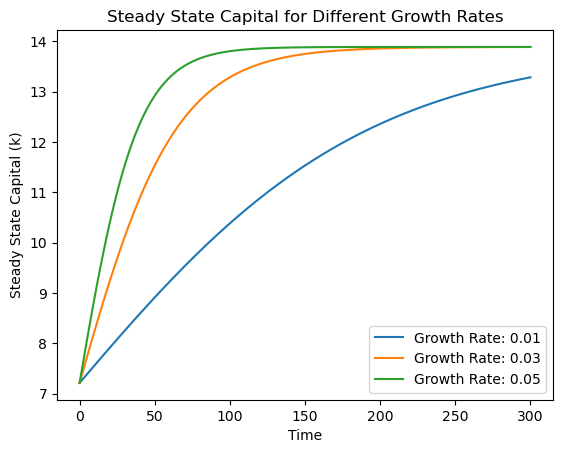

In [30]:
# Parameters for the modified model with endogenous technological growth rate
# Different growth rates of the technological variable

A_growth_rates = [0.01, 0.03, 0.05]  

# Here we define a function to calculate the steady state level of capital

def calculate_steady_state(A):
    k_ss = ((savings_rate * A) / (depreciation_rate + A * labor_force_growth_rate))**(1 / (1 - labor_force_growth_rate))
    return k_ss

# Here we calculate the steady state levels for the modified model with endogenous technological growth rate

k_ss_endogenous = []

for A_growth_rate in A_growth_rates:
    A_endogenous = A_initial * np.exp(A_growth_rate * np.arange(0, 301))  # Technological level over time
    k_ss = calculate_steady_state(A_endogenous)
    k_ss_endogenous.append(k_ss)

# Here we plot the steady state levels for different growth rates

time_periods = np.arange(0, 301)

for i, A_growth_rate in enumerate(A_growth_rates):
    plt.plot(time_periods, k_ss_endogenous[i], label=f'Growth Rate: {A_growth_rate}')

plt.xlabel('Time')
plt.ylabel('Steady State Capital (k)')
plt.title('Steady State Capital for Different Growth Rates')
plt.legend()
plt.show()



Conclusion


The solow model shows that the economy, no matter its starting point, will converge to a steady state equilibrium of capital an and output per capita. Changin the savings rate (s), Depreciation rate (δ) and Labor force growth rate (n) does not change the steady state levels, but only the time it takes the economy to converge to SS.  

However, increasing (decreasing) total factor productivity, A and the output elasticity of capital, a will increase (decrease) the steady state levels of capital and output per capita. 


Our extension of the model showcases a shift in the time of convergence when altering the growth rate in the technological level, A. Increasing the growth rate, g will increase convergence to steady state, whereas a lower g will resul in a relatively slower convergence. However, the steady state is not affected by the differet growth rates. 